In [47]:
import typing
import numpy as np
import pygmt
import seaborn as sns
import xarray as xr
from matplotlib import pyplot as plt

In [48]:
R = np.random.rand

In [117]:
def incremental_bottom_left(size: int, R: typing.Callable):
    grid = np.ones((size, size))
    w, h = grid.shape
    
    def loop(start, end):
        inc1 = 1 if end[0]>start[0] else -1
        inc2 = 1 if end[1]>start[1] else -1
        for i in range(start[0]+inc1, end[0]-inc1, inc1):
            for j in range(start[1]+inc2, end[1]-inc2, inc2):
                # r = 
                grid[i, j] += (R() * grid[i-inc1, j] + R() * grid[i, j-inc2]) 
                
    loop((0,0), (w-1,h-1))
    loop((w-1,0), (0,h-1))
    loop((0,0), (w-1,h-1))
    loop((w-1,0), (0,h-1))
    
    
    return grid

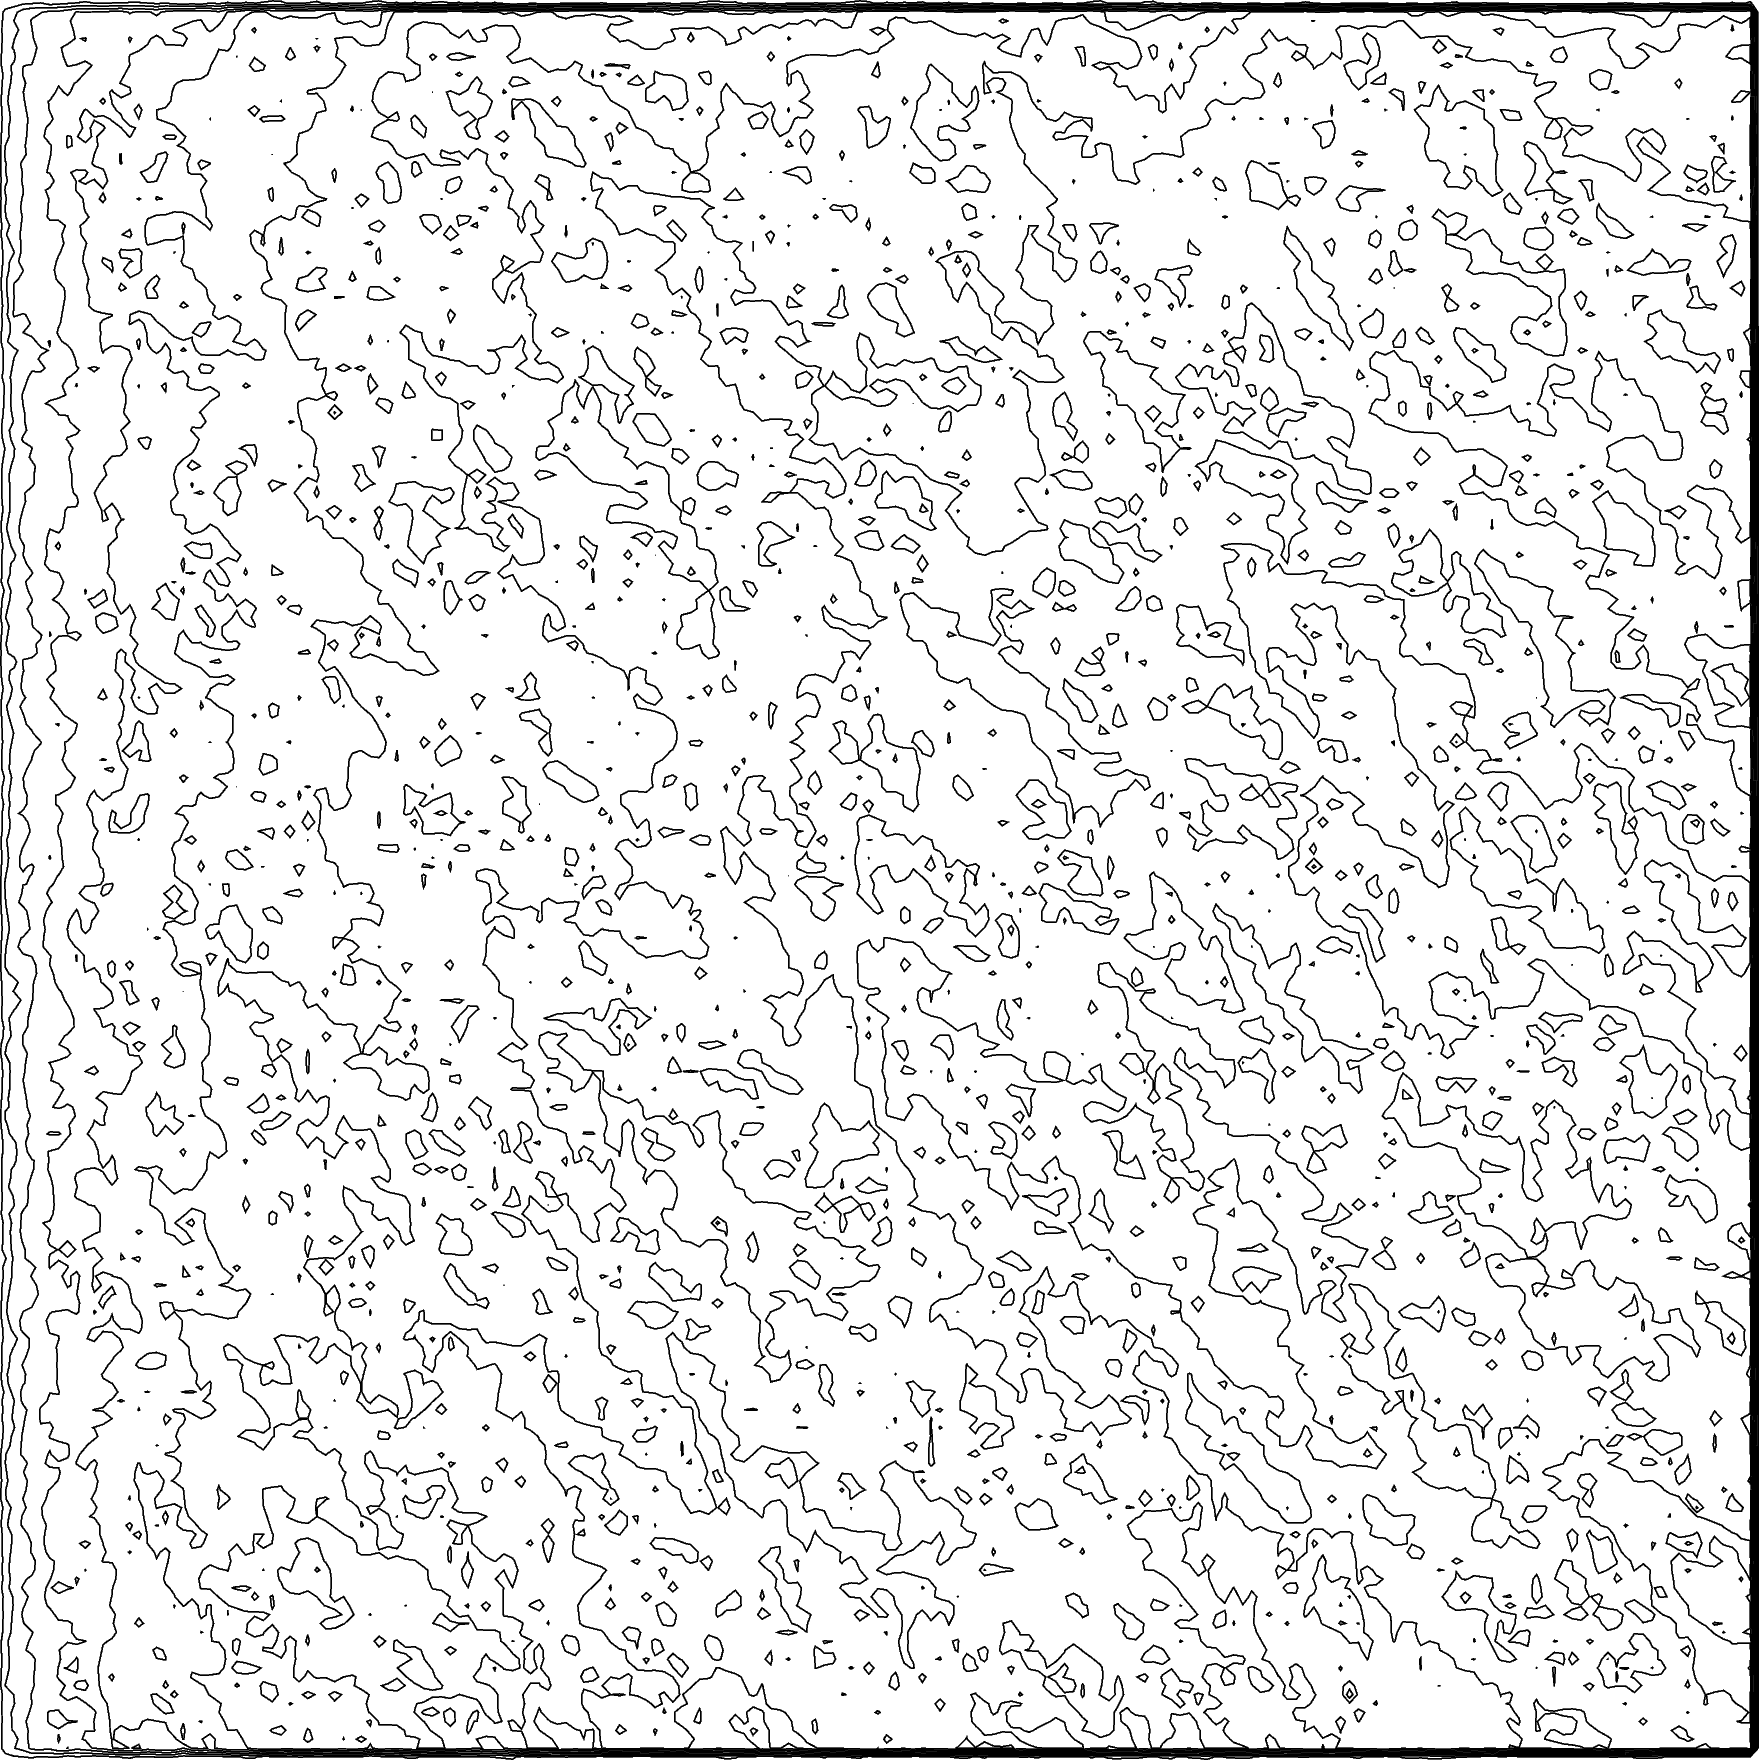

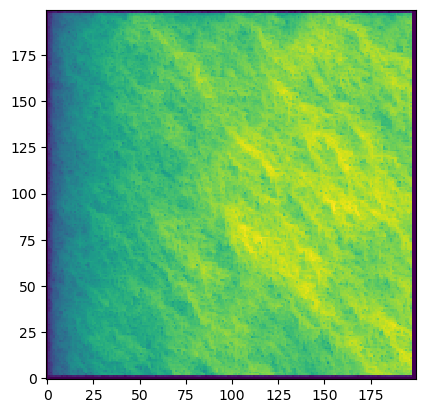

In [118]:
def contplot(procedure, size=200):
    np.random.seed(42)
    
    grid = procedure(size, R)
    grid = xr.DataArray(grid).astype(int)
    grid = np.log(grid)
    
    plt.imshow(grid, origin='lower', interpolation='none')
    
    fig = pygmt.Figure()
    fig.grdcontour(grid=grid, annotation='-')
    fig.show()
    
    return grid
    
grid = contplot(incremental_bottom_left)

In [88]:
grid

<xarray.DataArray (dim_0: 200, dim_1: 200)>
array([[     1,      1,      1, ...,      1,      1,      1],
       [     1,      7,     10, ...,     10,      1,      1],
       [     1,     10,     26, ..., 627680,      1,      1],
       ...,
       [     1,     11,     29, ..., 669955,      1,      1],
       [     1,      3,      4, ...,      8,      1,      1],
       [     1,      1,      1, ...,      1,      1,      1]])
Dimensions without coordinates: dim_0, dim_1